In [1]:
import pandas as pd
import numpy as np

In [2]:
import ast


from graphviz  import Source


from IPython.display import SVG


from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree



In [3]:
oringinal_df = pd.read_csv('dota_hero_stats.csv' , index_col=0)
oringinal_df

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [4]:
train_test_df = oringinal_df.copy()

In [5]:
target = train_test_df["attack_type"]
train_test_df.drop(["attack_type" , "id" , "localized_name" , "name"] ,  axis = 1 , inplace=True)


In [6]:
train_test_df

,legs,primary_attr,roles
0,2,agi,"['Carry', 'Escape', 'Nuker']"
1,2,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,4,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,2,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,2,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...
112,2,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,2,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,2,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,2,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [7]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   legs          117 non-null    int64 
 1   primary_attr  117 non-null    object
 2   roles         117 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [8]:

train_test_df['roles'] = train_test_df['roles'].apply(ast.literal_eval)


In [9]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   legs          117 non-null    int64 
 1   primary_attr  117 non-null    object
 2   roles         117 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [10]:
mlb = MultiLabelBinarizer()
roles = train_test_df['roles']

train_test_df.drop(['roles'] ,  axis = 1 , inplace=True)

roles_dummies = pd.DataFrame(mlb.fit_transform(roles),columns=mlb.classes_, index=train_test_df.index)

In [11]:
train_test_df["primary_attr"] = pd.get_dummies(train_test_df["primary_attr"])

In [12]:
train_test_dummies = pd.get_dummies(roles_dummies)
train_test_dummies

,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,1,0,0,0
2,0,1,1,0,0,0,1,0,1
3,1,1,0,0,1,1,1,0,0
4,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
112,1,1,0,1,1,0,0,0,0
113,0,1,0,1,0,0,1,0,1
114,1,1,1,1,1,0,1,0,0
115,0,1,0,1,0,0,1,0,1


In [13]:
X = pd.concat([train_test_df , train_test_dummies] , axis=1)
X

,legs,primary_attr,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
0,2,1,1,0,0,1,0,0,1,0,0
1,2,0,0,1,1,0,1,1,0,0,0
2,4,0,0,1,1,0,0,0,1,0,1
3,2,1,1,1,0,0,1,1,1,0,0
4,2,0,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
112,2,1,1,1,0,1,1,0,0,0,0
113,2,0,0,1,0,1,0,0,1,0,1
114,2,1,1,1,1,1,1,0,1,0,0
115,2,0,0,1,0,1,0,0,1,0,1


In [14]:
X_no_legs= X.drop(["legs"] , axis=1)

In [15]:
target =  pd.get_dummies(target)
target

,Melee,Ranged
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
112,1,0
113,0,1
114,1,0
115,0,1


In [16]:
target_melee = target["Melee"]

In [17]:
le =LabelEncoder()
le.fit(target_melee)
y = le.transform(target_melee)
y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=45)

In [19]:
tree_model = DecisionTreeClassifier()

In [20]:
params = {'criterion' : ['entropy' , 'gini']  , 'max_depth' : range(1,7)  , 'min_samples_leaf': range(1,10) , 'max_features':['auto', 'sqrt', 'log2' , None]}
tree_search = GridSearchCV(tree_model, params , cv=5)
tree_search.fit(X_train,y_train)
best_tree = tree_search.best_estimator_
print(best_tree.score(X_train,y_train))
print(best_tree.score(X_test,y_test))

0.8172043010752689
0.7083333333333334


In [21]:
tree_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 3}

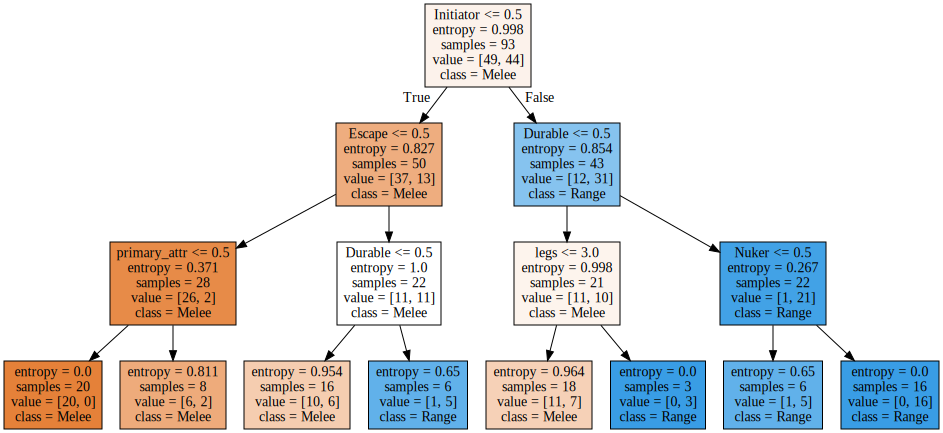

In [22]:
graph = Source(tree.export_graphviz(best_tree, out_file=None, feature_names=list(X_train),
class_names=["Melee", 'Range'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [23]:
cross_scores = cross_val_score(
       best_tree, X, y, cv=5)

In [24]:
cross_scores

array([0.75      , 0.83333333, 0.65217391, 0.7826087 , 0.7826087 ])

In [25]:
np.median(cross_scores)

0.782608695652174

In [26]:
print(best_tree.score(X,y))

0.7948717948717948


In [27]:
best_tree.min_samples_split

2

[Text(167.4, 190.26, 'X[6] <= 0.5\nentropy = 0.998\nsamples = 93\nvalue = [49, 44]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.827\nsamples = 50\nvalue = [37, 13]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 0.5\nentropy = 0.371\nsamples = 28\nvalue = [26, 2]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 0.5\nentropy = 1.0\nsamples = 22\nvalue = [11, 11]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 0.5\nentropy = 0.854\nsamples = 43\nvalue = [12, 31]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 3.0\nentropy = 0.998\nsamples = 21\nvalue = [11, 10]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.964\nsamples = 18\nvalue

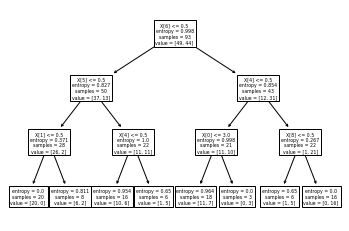

In [28]:
tree.plot_tree(best_tree)